Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

Reading CSV

In [73]:
df = pd.read_csv('Hyderabad.csv')


In [74]:
df.head()

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [75]:
df.shape

(657, 5)

In [76]:
df.columns

Index(['links', 'names', 'ratings', 'cuisine', 'price for one'], dtype='object')

In [77]:
df = df.drop(['links'], axis = 1)
df.head()

,names,ratings,cuisine,price for one
0,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   names          657 non-null    object
 1   ratings        657 non-null    object
 2   cuisine        657 non-null    object
 3   price for one  657 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 20.7+ KB


Dropping Duplicates

In [79]:
df.drop_duplicates(inplace = True)
df.shape

(657, 4)

In [80]:
df.head(2)

,names,ratings,cuisine,price for one
0,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100


Cleaning Rate Column

In [81]:
df['ratings'].unique()

array(['3.7', '3.9', '4.1', '4.3', '4', '4.2', '4.4', '4.5', '3.8', '4.6',
       '3.6', 'New', '3.4', '3.5', '3.1', '3.3', '2.7', '3.2', '-', '3',
       '4.7', '2.8', '2.9', '2.6'], dtype=object)

In [82]:
def handlerate(value):
    if(value=='New' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['ratings'] = df['ratings'].apply(handlerate)
df['ratings'].head()

0    3.7
1    3.9
2    4.1
3    3.9
4    4.3
Name: ratings, dtype: float64

Filling Null Values in Rate Column with Mean

In [83]:
df['ratings'].isnull().sum()

67

In [84]:
df['ratings'].fillna(df['ratings'].mean(), inplace = True)
df['ratings'].isnull().sum()

0

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   names          657 non-null    object 
 1   ratings        657 non-null    float64
 2   cuisine        657 non-null    object 
 3   price for one  657 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 25.7+ KB


Dropping Null Values

In [86]:
df.dropna(inplace = True)
df.head()

,names,ratings,cuisine,price for one
0,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [87]:
df.rename(columns = {'ratings':'rates', 'price for one':'cost1person'}, inplace = True)
df.head()

,names,rates,cuisine,cost1person
0,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [88]:
df['cuisine'].value_counts()

South Indian                                                                         67
Bakery, Desserts                                                                     23
Mithai, Street Food                                                                  22
Mithai                                                                               14
North Indian, Chinese                                                                13
                                                                                     ..
Chinese, North Indian, Sichuan                                                        1
Mithai, Desserts, Street Food                                                         1
Biryani, Cafe, North Indian, Continental, Street Food, Beverages, Desserts, Pizza     1
South Indian, Street Food, Juices, Beverages                                          1
Chinese, Momos                                                                        1
Name: cuisine, Length: 396, dtyp

In [89]:
cuisine = df['cuisine'].value_counts(ascending  = False)


cuisine_lessthan100 = cuisine[cuisine<10]



def handle_cuisine(value):
    if(value in cuisine_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisine'] = df['cuisine'].apply(handle_cuisine)
df['cuisine'].value_counts()

others                   506
South Indian              67
Bakery, Desserts          23
Mithai, Street Food       22
Mithai                    14
North Indian, Chinese     13
North Indian              12
Name: cuisine, dtype: int64

In [90]:
df['cost1person'].unique()


array([100, 150, 400,  50, 350, 300, 200, 250])

In [91]:
#Removing , from cost1person Column (like 1,200 , 7,000)
# def handlecomma(value):
#     value = str(value)
#     if ',' in value:
#         value = value.replace(',', '')
#         return float(value)
#     else:
#         return float(value)
    
# df['cost1person'] = df['cost1person'].apply(handlecomma)
# df['cost1person'].unique()
        


In [92]:
df.head()

,names,rates,cuisine,cost1person
0,Sahara Bakers,3.7,others,100
1,KFC,3.9,others,100
2,Subbaiah Gari Hotel,4.1,others,100
3,Paradise Biryani,3.9,others,100
4,Pista House Bakery,4.3,others,100


Data is Clean, Lets jump to Visualization

Count Plot of Various rates

/home/linux/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '2.6'),
  Text(1, 0, '2.7'),
  Text(2, 0, '2.8'),
  Text(3, 0, '2.9'),
  Text(4, 0, '3.0'),
  Text(5, 0, '3.1'),
  Text(6, 0, '3.2'),
  Text(7, 0, '3.3'),
  Text(8, 0, '3.4'),
  Text(9, 0, '3.5'),
  Text(10, 0, '3.6'),
  Text(11, 0, '3.7'),
  Text(12, 0, '3.8'),
  Text(13, 0, '3.9'),
  Text(14, 0, '3.946101694915254'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.1'),
  Text(17, 0, '4.2'),
  Text(18, 0, '4.3'),
  Text(19, 0, '4.4'),
  Text(20, 0, '4.5'),
  Text(21, 0, '4.6'),
  Text(22, 0, '4.7')])

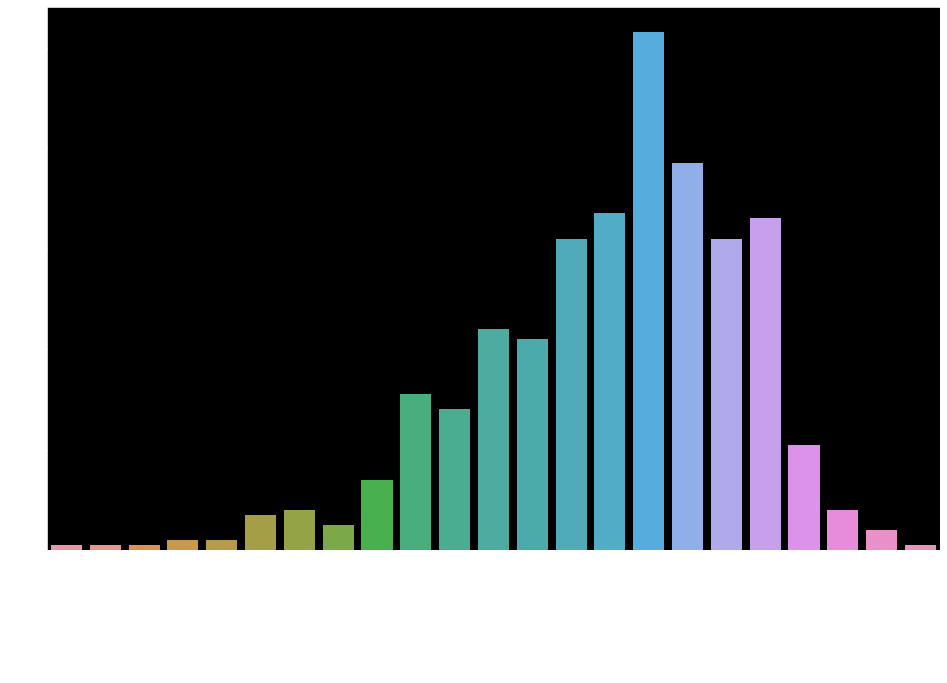

In [93]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['rates'])
plt.xticks(rotation=90)